In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
diab = pd.read_csv("./Dataset of Diabetes .csv")
diab.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
diab.shape

(1000, 14)

In [4]:
diab.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [5]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
diab.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [7]:
diab.dtypes

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

In [8]:
#fig, ax = plt.subplots(2,3)

In [9]:
#pip install seaborn --upgrade

In [10]:
#diabetes['Gender'] = pd.to_numeric(diabetes['Gender'],errors='coerce')
#diabetes['CLASS'] = pd.to_numeric(diabetes['CLASS'],errors='coerce')
#diabetes.head()
#diabetes.dtypes

In [11]:
diab.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [12]:
diab["Gender"].replace({'M': 1, 'F': 0}, inplace=True)
diab["CLASS"].replace({'N': 0, 'Y': 1, 'P': 2}, inplace=True)
diab.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [13]:
diab['Gender'] = pd.to_numeric(diab['Gender'],errors='coerce')
diab['CLASS'] = pd.to_numeric(diab['CLASS'],errors='coerce')
diab.head()
diab.dtypes

ID             int64
No_Pation      int64
Gender       float64
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS        float64
dtype: object

In [14]:
diab.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,735,34221,1.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,420,47975,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,680,87656,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,504,34223,1.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0


C:\Users\lordf\AppData\Local\Temp\ipykernel_27172\390466519.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab.AGE, bins = 20, ax=ax[0,0])
C:\Users\lordf\AppData\Local\Temp\ipykernel_27172\390466519.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab.Gender,bins = 20, ax=ax[0,1])
C:\U

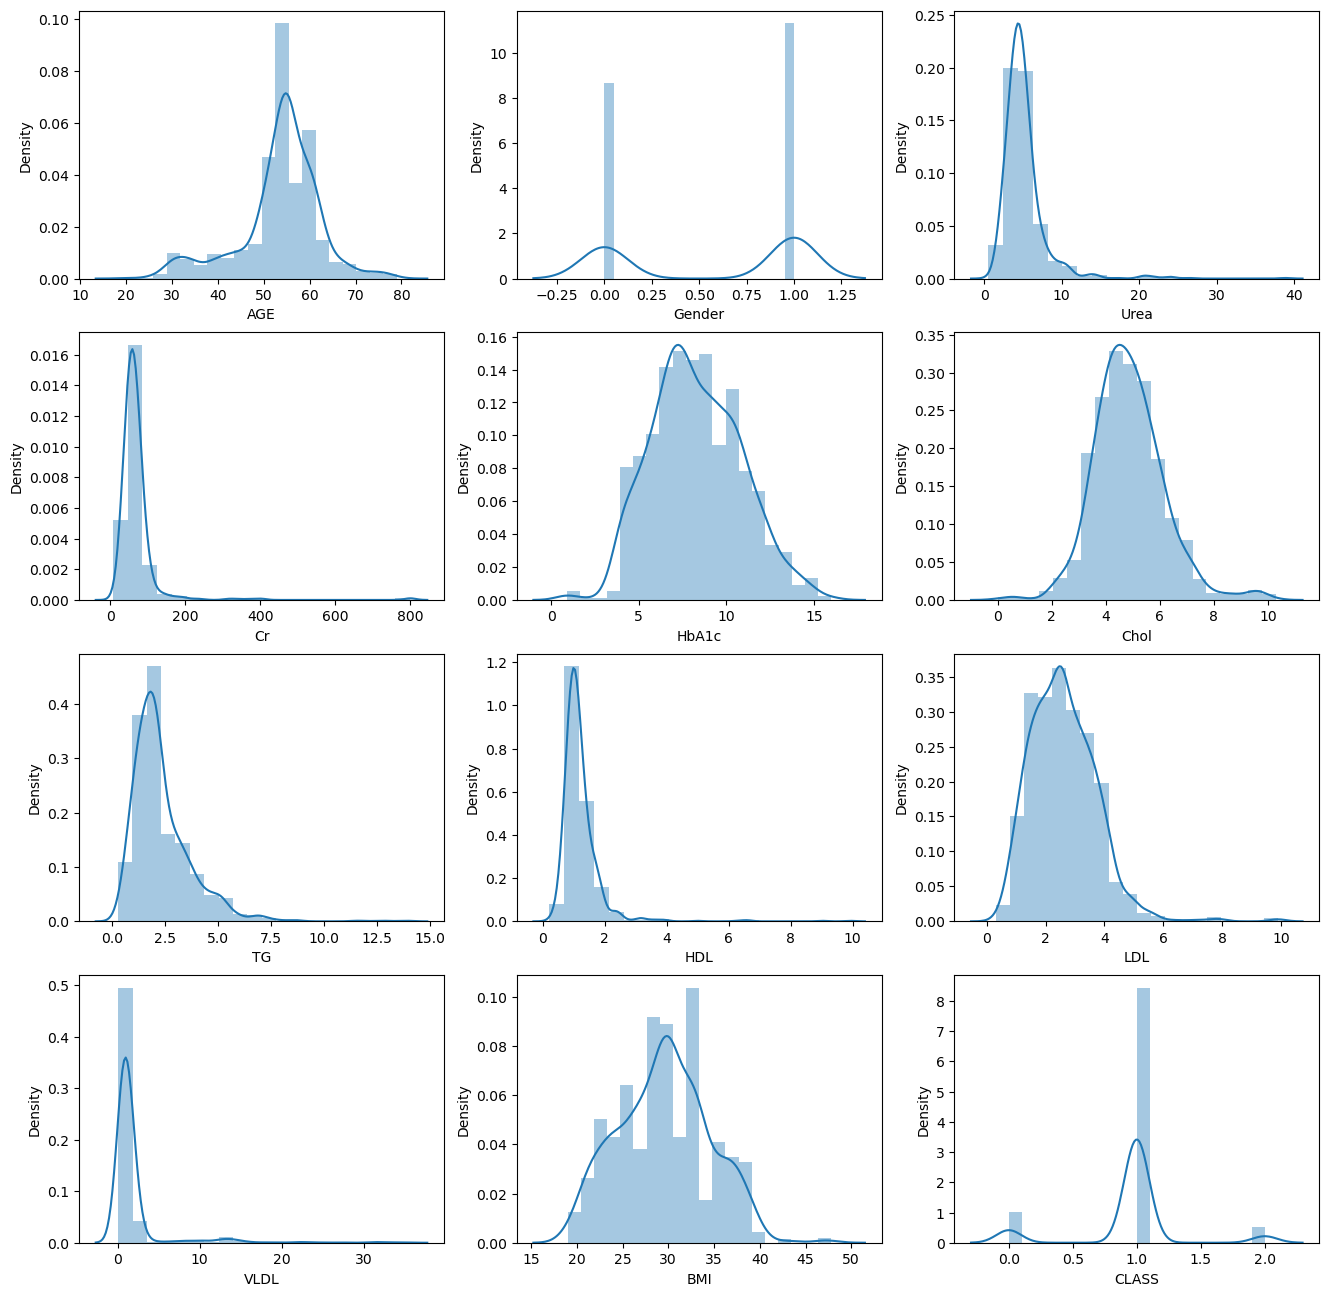

In [15]:
fig, ax = plt.subplots(4,3, figsize=(16,16))
sns.distplot(diab.AGE, bins = 20, ax=ax[0,0])
sns.distplot(diab.Gender,bins = 20, ax=ax[0,1])
sns.distplot(diab.Urea, bins = 20, ax=ax[0,2])
sns.distplot(diab.Cr, bins=20, ax=ax[1,0])
sns.distplot(diab.HbA1c, bins= 20, ax=ax[1,1])
sns.distplot(diab.Chol, bins=20, ax=ax[1,2])
sns.distplot(diab.TG, bins= 20, ax=ax[2,0])
sns.distplot(diab.HDL, bins=20, ax=ax[2,1])
sns.distplot(diab.LDL, bins=20, ax=ax[2,2])
sns.distplot(diab.VLDL, bins=20, ax=ax[3,0])
sns.distplot(diab.BMI, bins=20, ax=ax[3,1])
sns.distplot(diab.CLASS, bins=20, ax=ax[3,2])            
fig.show()

<Axes: >

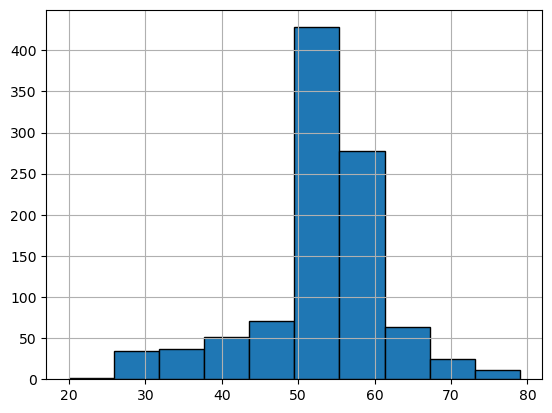

In [16]:
diab["AGE"].hist(edgecolor = "black")

<Axes: >

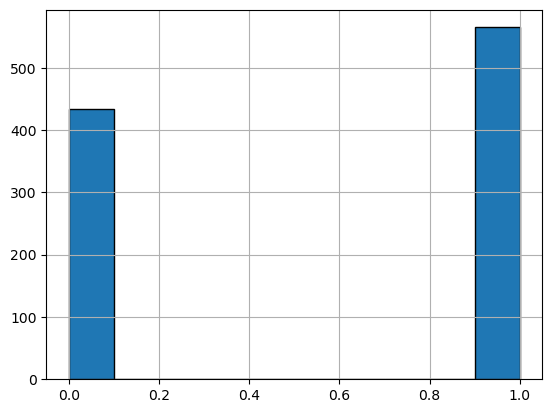

In [17]:
diab["Gender"].hist(edgecolor = "black")

<Axes: >

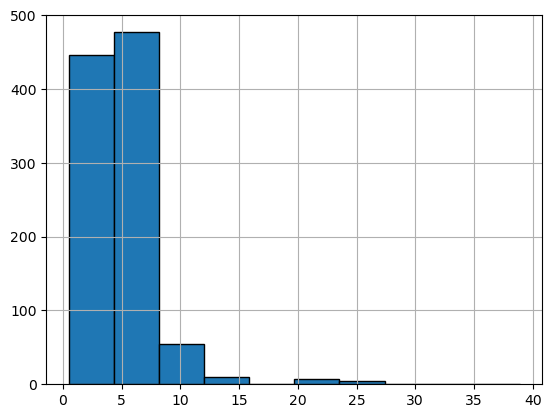

In [18]:
diab["Urea"].hist(edgecolor = "black")

<Axes: >

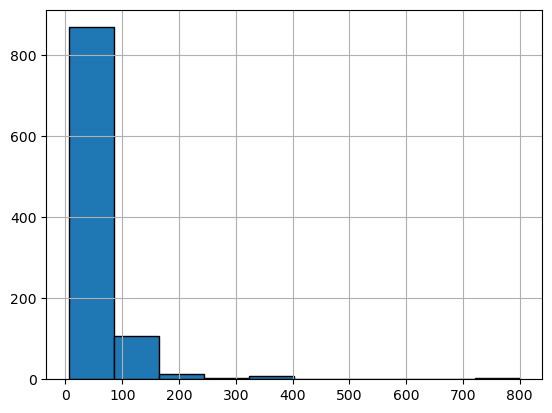

In [19]:
diab["Cr"].hist(edgecolor = "black")

<Axes: >

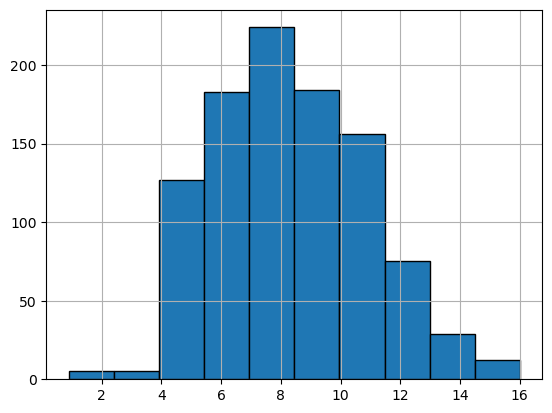

In [20]:
diab["HbA1c"].hist(edgecolor = "black")

<Axes: >

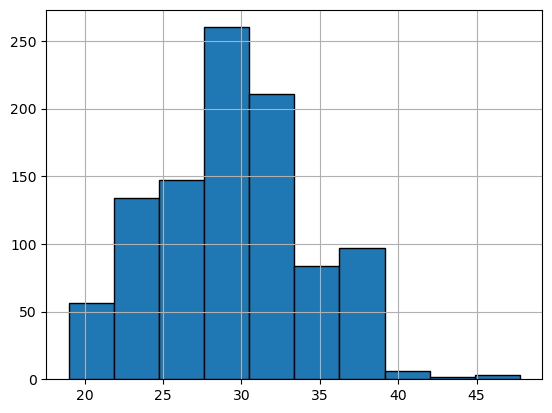

In [21]:
diab["BMI"].hist(edgecolor = "black")

In [22]:
#f,ax=plt.subplots(1,2,figsize=(15,5))
#explode = [0, 0.1, 0]
#diab['CLASS'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%',ax=ax[0],shadow=True)
#ax[0].set_title('target')
#ax[0].set_ylabel('')
#sns.countplot('CLASS',data=diab,ax=ax[1])
#ax[1].set_title('CLASS')
#plt.show()

In [23]:
diab.dtypes

ID             int64
No_Pation      int64
Gender       float64
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS        float64
dtype: object

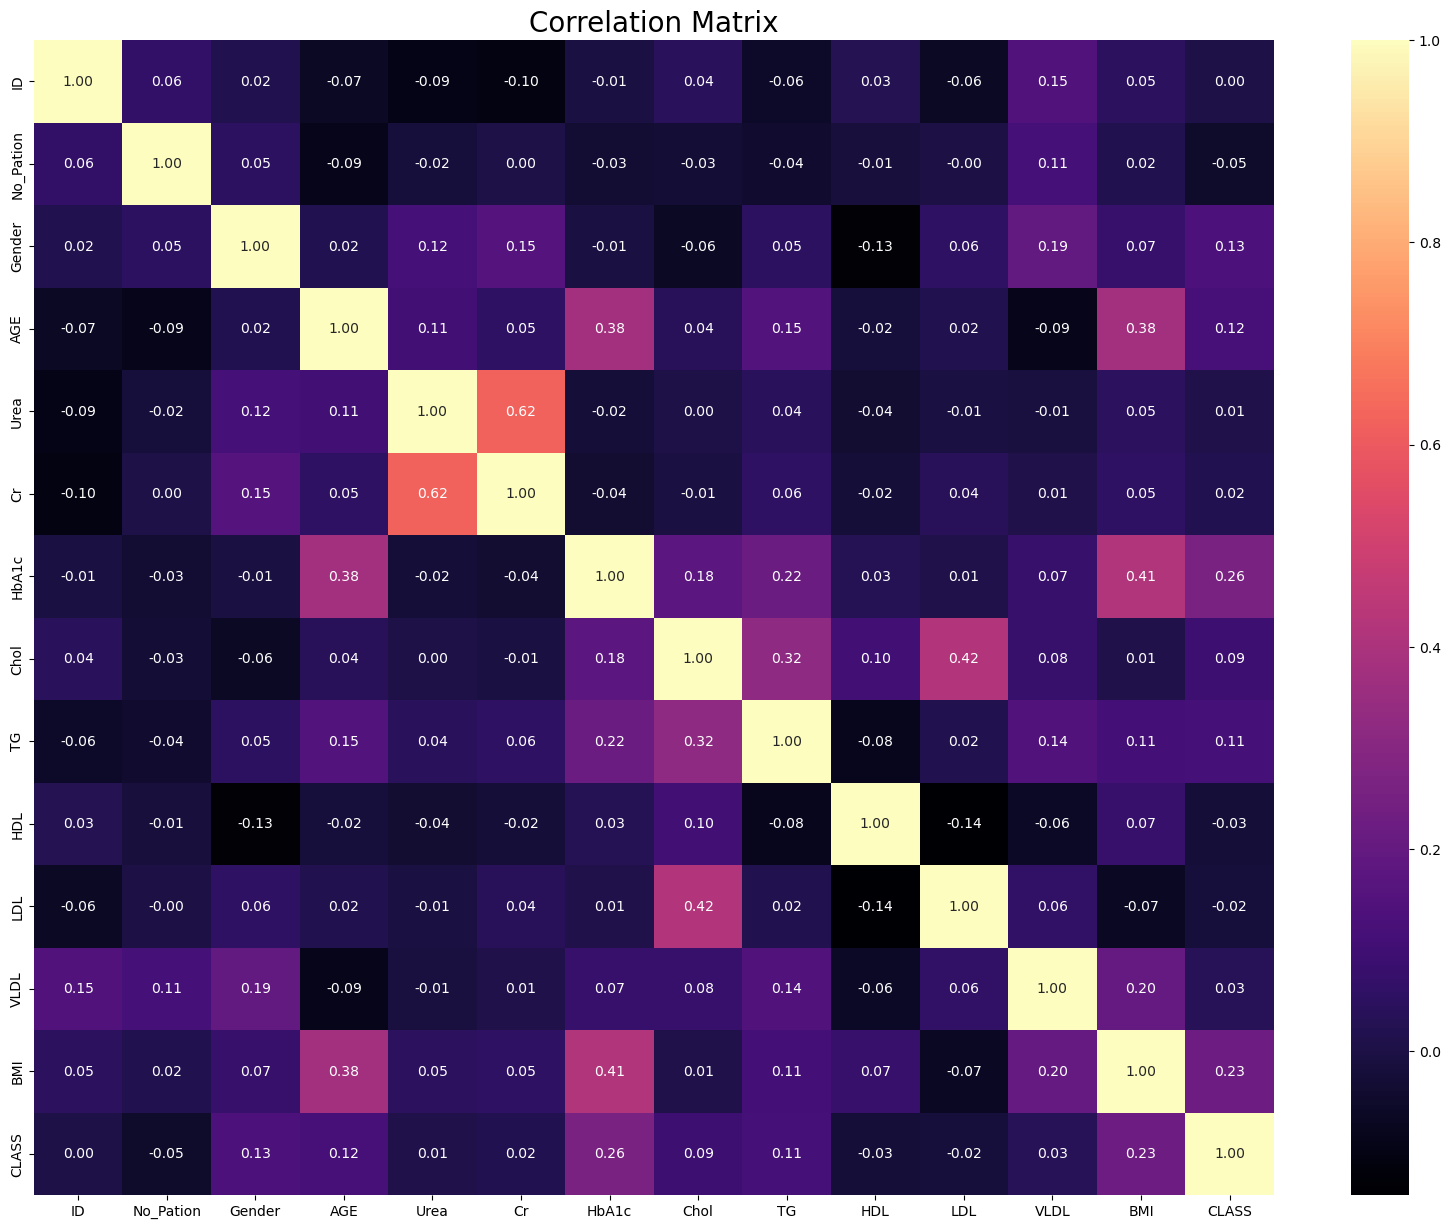

In [24]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(diab.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [25]:
diab.isnull().sum()

ID           0
No_Pation    0
Gender       1
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        5
dtype: int64

In [26]:
diab = diab.dropna()
# Impute missing values with the mean
diab = diab.fillna(diab.mean())

In [27]:
np.isinf(diab).sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [28]:
# Instantiate the StandardScaler object
scaler = StandardScaler()
# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(diab)

In [29]:
# Convert the numpy array back into a pandas dataframe
scaled_df = pd.DataFrame(scaled_data, columns=diab.columns)
# View the first few rows of the scaled dataframe
print(scaled_df.head())

         ID  No_Pation    Gender       AGE      Urea        Cr     HbA1c  \
0  0.673098  -0.074695 -1.135924 -0.412671 -0.144317 -0.382111 -1.336669   
1  1.642538  -0.069901  0.880341 -3.161046 -0.212328 -0.115980 -1.336669   
2  0.331922  -0.065843 -1.135924 -0.412671 -0.144317 -0.382111 -1.336669   
3  1.413701  -0.054135 -1.135924 -0.412671 -0.144317 -0.382111 -1.336669   
4  0.681419  -0.069901  0.880341 -2.359437  0.671822 -0.382111 -1.336669   

       Chol        TG       HDL       LDL      VLDL       BMI     CLASS  
0 -0.509867 -1.035520  1.806512 -1.081611 -0.366171 -1.122833 -2.426517  
1 -0.893337 -0.679287 -0.158533 -0.455287 -0.338556 -1.324793 -2.426517  
2 -0.509867 -1.035520  1.806512 -1.081611 -0.366171 -1.122833 -2.426517  
3 -0.509867 -1.035520  1.806512 -1.081611 -0.366171 -1.122833 -2.426517  
4  0.026989 -0.964273 -0.612005 -0.544762 -0.393787 -1.728713 -2.426517  


In [30]:
scaled_df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [31]:
scaled_df = scaled_df.dropna()
# Impute missing values with the mean
scaled_df = scaled_df.fillna(scaled_df.mean())

In [32]:
np.isinf(scaled_df).sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [33]:
X = scaled_df.drop(columns=['ID', 'No_Pation', 'CLASS'])
Y = scaled_df['CLASS']

In [34]:
X.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
dtype: int64

In [35]:
# Print the unique values in Y
print(np.unique(Y))


[-2.42651733  0.12581942  2.67815616]


In [36]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable Y
le = LabelEncoder()
Y = le.fit_transform(Y)

In [37]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Print the shape of each array to verify the split was successful
print("Shape of X:", X.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X: (994, 11)
Shape of X_train: (795, 11)
Shape of X_test: (199, 11)
Shape of Y_train: (795,)
Shape of Y_test: (199,)


1. LOGISTICS REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [39]:
# Predict on the test set and evaluate the model
LR_Train = LR.predict(X_train)
# calculate accuracy
accuracy = accuracy_score(Y_train, LR_Train)
print('Accracy:', accuracy)
# calculate precision
precision = metrics.precision_score(Y_train, LR_Train,average = 'weighted')
print('Precision:', precision)
# calculate recall
recall = metrics.recall_score(Y_train, LR_Train,average = 'weighted')
print('Recall :', recall)

Accracy: 0.9245283018867925
Precision: 0.9185559769118964
Recall : 0.9245283018867925


In [65]:
# Predict on the test set and evaluate the model
LR_test = LR.predict(X_test)
accuracy = accuracy_score(Y_test, LR_test)
print('Accracy:', accuracy)
precision = metrics.precision_score(Y_test, LR_test,average = 'weighted')
print('Precision:', precision)
recall = metrics.recall_score(Y_test, LR_test,average = 'weighted')
print('Recall :', recall)

Accracy: 0.9396984924623115
Precision: 0.9160621288259478
Recall : 0.9396984924623115


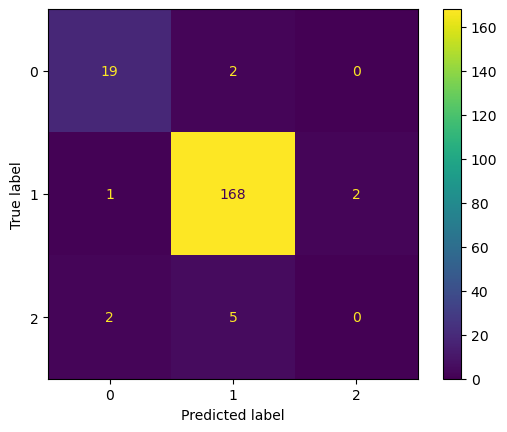

In [80]:
#class_names = encoder.classes_,display_labels=class_names
#class_names = ['Non-Diabetic', 'Diabetic', 'Predicted-Diabetic'] 
cm = metrics.confusion_matrix(Y_test, LR_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [97]:
print("Logistic Regression:")
print("Classification Report:")
print(classification_report(Y_test, LR_test))

f1 = f1_score(Y_test, LR_test, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))


Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.96      0.98      0.97       171
           2       0.00      0.00      0.00         7

    accuracy                           0.94       199
   macro avg       0.61      0.63      0.62       199
weighted avg       0.92      0.94      0.93       199

F1 Score: 92.77%


2. SUPPORT VECTOR MACHNE

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Create the SVM model
SV = SVC(kernel='linear')
# Fit the model on the training data
SV.fit(X_train, Y_train)

SVC(kernel='linear')

In [63]:
# Predict the classes of the train data
SV_train = SV.predict(X_train)
# calculate accuracy
accuracy = accuracy_score(Y_train, SV_train)
print('Accracy:', accuracy)
# calculate precision
precision = metrics.precision_score(Y_train, SV_train,average = 'weighted')
print('Precision:', precision)
# calculate recall
recall = metrics.recall_score(Y_train, SV_train,average = 'weighted')
print('Recall :', recall)

Accracy: 0.9459119496855346
Precision: 0.9440311558976033
Recall : 0.9459119496855346


In [61]:
# Predict the classes of the test data
SV_test = SV.predict(X_test)
# calculate accuracy
accuracy = accuracy_score(Y_test, SV_test)
print('Accracy:', accuracy)
# calculate precision
precision = metrics.precision_score(Y_test, SV_test,average = 'weighted')
print('Precision:', precision)
# calculate recall
recall = metrics.recall_score(Y_test, SV_test,average = 'weighted')
print('Recall :', recall)

Accracy: 0.9547738693467337
Precision: 0.9519807392189533
Recall : 0.9547738693467337


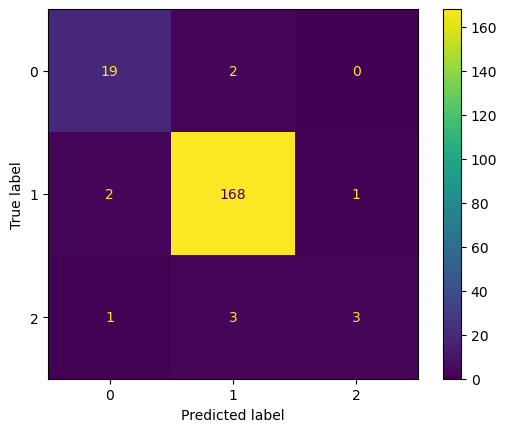

In [62]:
cm = metrics.confusion_matrix(Y_test, SV_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [101]:
print("Support Vector Machine:")
print("Classification Report:")
print(classification_report(Y_test, SV_test))
f1 = f1_score(Y_test, SV_test, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))

Support Vector Machine:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.97      0.98      0.98       171
           2       0.75      0.43      0.55         7

    accuracy                           0.95       199
   macro avg       0.86      0.77      0.80       199
weighted avg       0.95      0.95      0.95       199

F1 Score: 95.18%


3. LDA

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Create the LDA model
LDA = LinearDiscriminantAnalysis()
# Fit the model on the training data
LDA.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [45]:
# Predict the classes of the train data
LDA_train = LDA.predict(X_train)
# Calculate accuracy
accuracy = accuracy_score(Y_train, LDA_train)
print('Accuracy:', accuracy)
# Calculate precision
precision = precision_score(Y_train, LDA_train, average='weighted')
print('Precision:', precision)
# Calculate recall
recall = recall_score(Y_train, LDA_train, average='weighted')
print('Recall :', recall)

Accuracy: 0.8930817610062893
Precision: 0.8956579510080538
Recall : 0.8930817610062893


In [46]:
# Predict the classes of the test data
LDA_test = LDA.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(Y_test, LDA_test)
print('Accuracy:', accuracy)
# Calculate precision
precision = precision_score(Y_test, LDA_test, average='weighted')
print('Precision:', precision)
# Calculate recall
recall = recall_score(Y_test, LDA_test, average='weighted')
print('Recall :', recall)

Accuracy: 0.9246231155778895
Precision: 0.9225008176979572
Recall : 0.9246231155778895


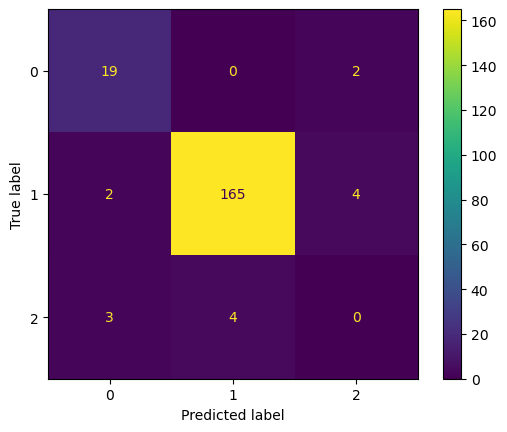

In [59]:
cm = metrics.confusion_matrix(Y_test, LDA_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [102]:
print("Linear Discriminant Analysis:")
print("Classification Report:")
print(classification_report(Y_test, LDA_test))
f1 = f1_score(Y_test, LDA_test, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))

Linear Discriminant Analysis:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.98      0.96      0.97       171
           2       0.00      0.00      0.00         7

    accuracy                           0.92       199
   macro avg       0.59      0.62      0.61       199
weighted avg       0.92      0.92      0.92       199

F1 Score: 92.31%


4. DECISION TREE CLASSIFIER

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
DT = DecisionTreeClassifier(max_depth=3, random_state=52)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=52)

In [52]:
DT_train = DT.predict(X_train)
# calculate accuracy
accuracy = accuracy_score(Y_train, DT_train)
print('Accracy:', accuracy)
# calculate precision
precision = metrics.precision_score(Y_train, DT_train,average = 'weighted')
print('Precision:', precision)
# calculate recall
recall = metrics.recall_score(Y_train, DT_train,average = 'weighted')
print('Recall :', recall)

Accracy: 0.9735849056603774
Precision: 0.978060091393019
Recall : 0.9735849056603774


In [53]:
DT_test = DT.predict(X_test)
# calculate accuracy
accuracy = accuracy_score(Y_test, DT_test)
print('Accracy:', accuracy)
# calculate precision
precision = metrics.precision_score(Y_test, DT_test,average = 'weighted')
print('Precision:', precision)
# calculate recall
recall = metrics.recall_score(Y_test, DT_test,average = 'weighted')
print('Recall :', recall)

Accracy: 0.9849246231155779
Precision: 0.9868090452261307
Recall : 0.9849246231155779


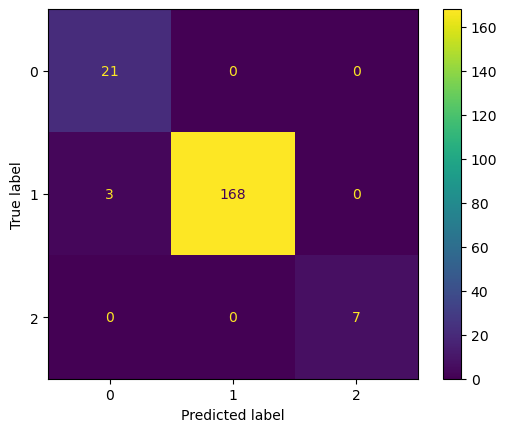

In [58]:
cm = metrics.confusion_matrix(Y_test, DT_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [98]:
print("Decision Tree Classifier:")
print("Classification Report:")
print(classification_report(Y_test, DT_test))
f1 = f1_score(Y_test, DT_test, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))

Decision Tree Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.98      0.99       171
           2       1.00      1.00      1.00         7

    accuracy                           0.98       199
   macro avg       0.96      0.99      0.97       199
weighted avg       0.99      0.98      0.99       199

F1 Score: 98.54%


5. Gaussian Naive Bayes

In [82]:
# Create Naive Bayes model
GNB = GaussianNB()
# Train the model using the training set
GNB.fit(X_train, Y_train)

GaussianNB()

In [85]:
GNB_train = GNB.predict(X_train)
# Calculate accuracy
accuracy = accuracy_score(Y_train, GNB_train)
print("Training Accuracy: {:.2f}%".format(accuracy * 100))
# Calculate precision
precision = metrics.precision_score(Y_train, GNB_train, average='weighted')
print("Training Precision: {:.2f}%".format(precision * 100))
# Calculate recall
recall = metrics.recall_score(Y_train, GNB_train, average='weighted')
print("Training Recall: {:.2f}%".format(recall * 100))

Training Accuracy: 94.09%
Training Precision: 95.01%
Training Recall: 94.09%


In [86]:
GNB_test = GNB.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(Y_test, GNB_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# Calculate precision
precision = metrics.precision_score(Y_test, GNB_test, average='weighted')
print("Precision: {:.2f}%".format(precision * 100))
# Calculate recall
recall = metrics.recall_score(Y_test, GNB_test, average='weighted')
print("Recall: {:.2f}%".format(recall * 100))

Accuracy: 95.48%
Precision: 96.03%
Recall: 95.48%


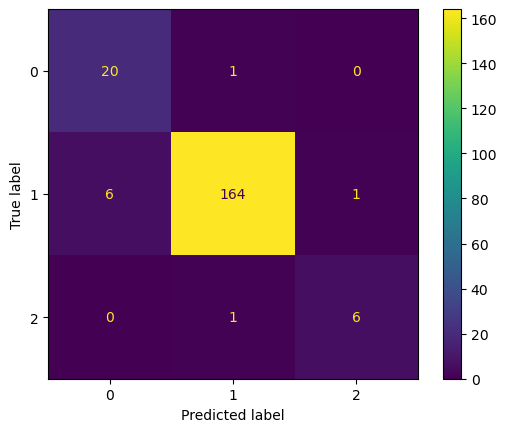

In [87]:
cm = metrics.confusion_matrix(Y_test, GNB_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [94]:
# Generate classification report
print("Classification Report:")
print(classification_report(Y_test, GNB_test))

# Calculate F1 score
f1 = f1_score(Y_test, GNB_test, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.99      0.96      0.97       171
           2       0.86      0.86      0.86         7

    accuracy                           0.95       199
   macro avg       0.87      0.92      0.89       199
weighted avg       0.96      0.95      0.96       199

F1 Score: 95.63%


GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForest Classifier

In [109]:
CLF_optimized = RandomForestClassifier(**best_params, random_state=42)
CLF_optimized.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, n_estimators=50, random_state=42)

In [115]:
CLF_test_optimized = CLF_optimized.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(Y_test, CLF_test_optimized)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# Calculate precision
precision = metrics.precision_score(Y_test, CLF_test_optimized, average='weighted')
print("Precision: {:.2f}%".format(precision * 100))
# Calculate recall
recall = metrics.recall_score(Y_test, CLF_test_optimized, average='weighted')
print("Recall: {:.2f}%".format(recall * 100))

Accuracy: 97.99%
Precision: 97.95%
Recall: 97.99%


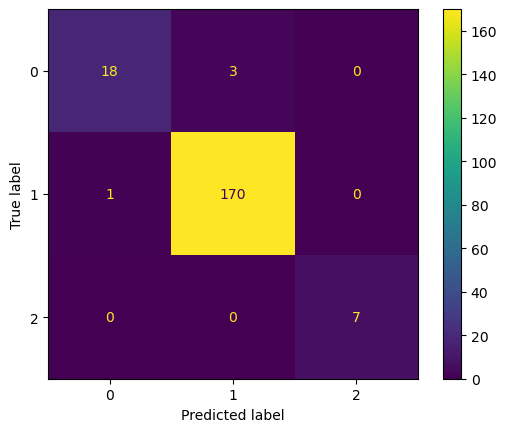

In [113]:
cm = metrics.confusion_matrix(Y_test, CLF_test_optimized)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [114]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix
# Predict the classes of the test data using the optimized model
CLF_test_optimized = CLF_optimized.predict(X_test)
# Generate classification report
print("Classification Report:")
print(classification_report(Y_test, CLF_test_optimized))
# Calculate F1 score
f1 = f1_score(Y_test, CLF_test_optimized, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.98      0.99      0.99       171
           2       1.00      1.00      1.00         7

    accuracy                           0.98       199
   macro avg       0.98      0.95      0.96       199
weighted avg       0.98      0.98      0.98       199

F1 Score: 97.95%


In [120]:
# Define the models list
models = [LR, SV, LDA, DT, CLF_optimized, GNB]

# Define the model names list
model_names = ['LR', 'SV', 'LDA', 'DT', 'CLF_optimized', 'GNB']

# Call the function to calculate the scores
train_accuracy_scores, test_accuracy_scores, train_f1_scores, test_f1_scores = calculate_scores(models, X_train, Y_train, X_test, Y_test)

# Create a DataFrame with the scores
results_df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy_scores,
    'Test Accuracy': test_accuracy_scores,
    'Train F1 Score': train_f1_scores,
    'Test F1 Score': test_f1_scores
})
# Display the table
print(results_df)

           Model  Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score
0             LR        0.924528       0.939698        0.917508       0.927718
1             SV        0.945912       0.954774        0.942421       0.951757
2            LDA        0.893082       0.924623        0.893648       0.923135
3             DT        1.000000       0.989950        1.000000       0.990056
4  CLF_optimized        1.000000       0.984925        1.000000       0.985078
5            GNB        0.940881       0.954774        0.943608       0.956309


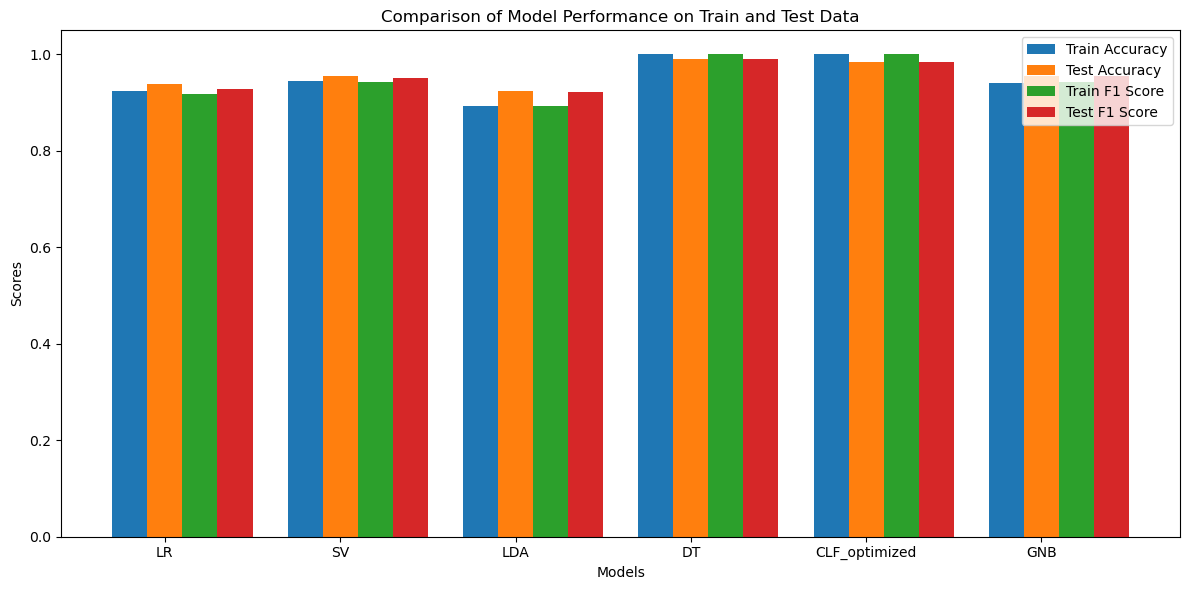

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Create a spaced unstacked bar graph using matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
x = np.arange(len(model_names))

ax.bar(x - bar_width, results_df['Train Accuracy'], width=bar_width, label='Train Accuracy')
ax.bar(x, results_df['Test Accuracy'], width=bar_width, label='Test Accuracy')
ax.bar(x + bar_width, results_df['Train F1 Score'], width=bar_width, label='Train F1 Score')
ax.bar(x + 2 * bar_width, results_df['Test F1 Score'], width=bar_width, label='Test F1 Score')

ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance on Train and Test Data')
ax.legend()

plt.tight_layout()
plt.show()